In [18]:
from warcio.archiveiterator import ArchiveIterator
import os
from urllib.parse import urlparse
import matplotlib.pyplot as plt
from bs4.element import Comment
from bs4 import BeautifulSoup


In [2]:

path = "warc_store"
root_urls = set()
urls = set()
root = {}
for filename in os.listdir(path):
    filepath = os.path.join(path, filename)
    with open(filepath, 'rb') as stream:
        for record in ArchiveIterator(stream):
            url = record.rec_headers.get_header('WARC-Target-URI')
            root_urls.add(urlparse(url).hostname)
            urls.add(url)
            if urlparse(url).hostname in root:
                root[urlparse(url).hostname].append(url)
            else:
                root[urlparse(url).hostname] = [url]


In [7]:
print(len(urls))
print(len(root_urls))

100000
57267


In [3]:
r = root.copy()

for key, value in r.items():
    r[key] = len(value)

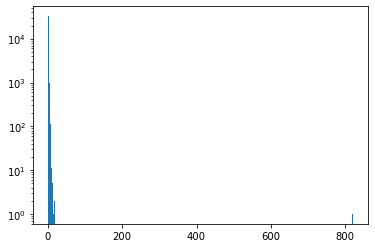

In [11]:

ax.hist(list(r.values()), bins=1000)


In [12]:
from scipy.stats import norm
import statistics

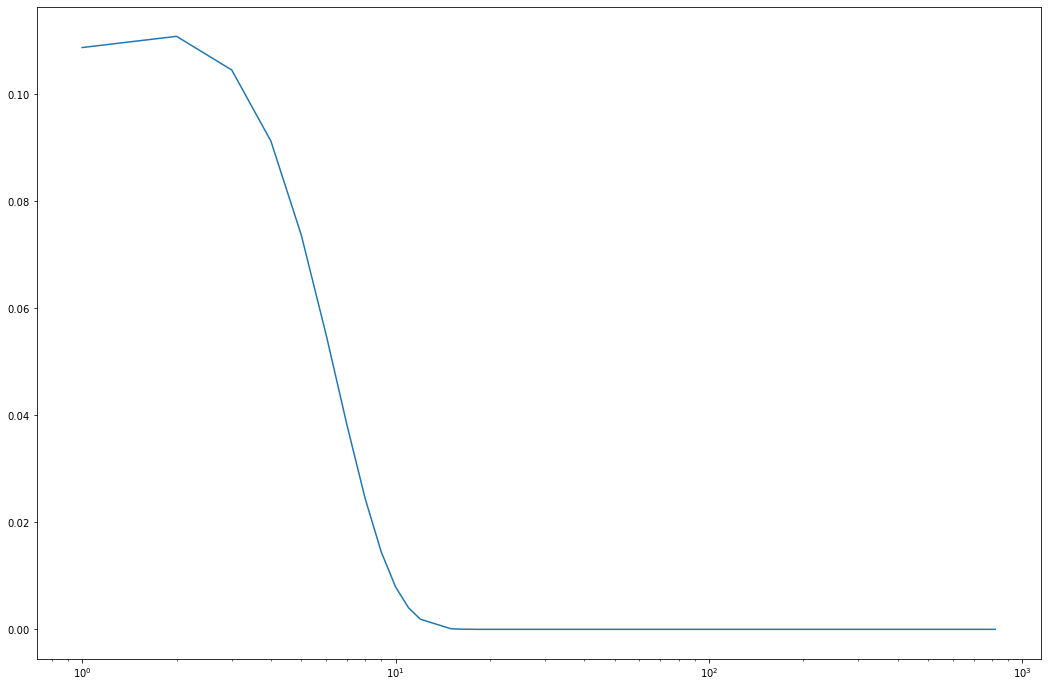

In [30]:

x = sorted(list(r.values()))
fig, ax = plt.subplots(figsize=(18, 12))

mean = statistics.mean(x)
sd = statistics.stdev(x)

ax.set_xscale('log')

ax.plot(x, norm.pdf(x, mean, sd))

In [23]:
def tag_visible(element):
    if element.parent.name in [
        "style",
        "script",
        "head",
        "title",
        "meta",
        "[document]",
    ]:
        return False
    if isinstance(element, Comment):
        return False
    return True

dtl = []
path = "warc_store"
for filename in os.listdir(path):
    filepath = os.path.join(path, filename)
    with open(filepath, 'rb') as stream:
        for record in ArchiveIterator(stream):
            html = record.content_stream().read()
            soup = BeautifulSoup(html, "html.parser")
            texts = soup.find_all(text=True)
            visible_texts = filter(tag_visible, texts)
            visible_text = " ".join(t.strip() for t in visible_texts)
            tokens = visible_text.split()
            dtl.append(len(visible_text))


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

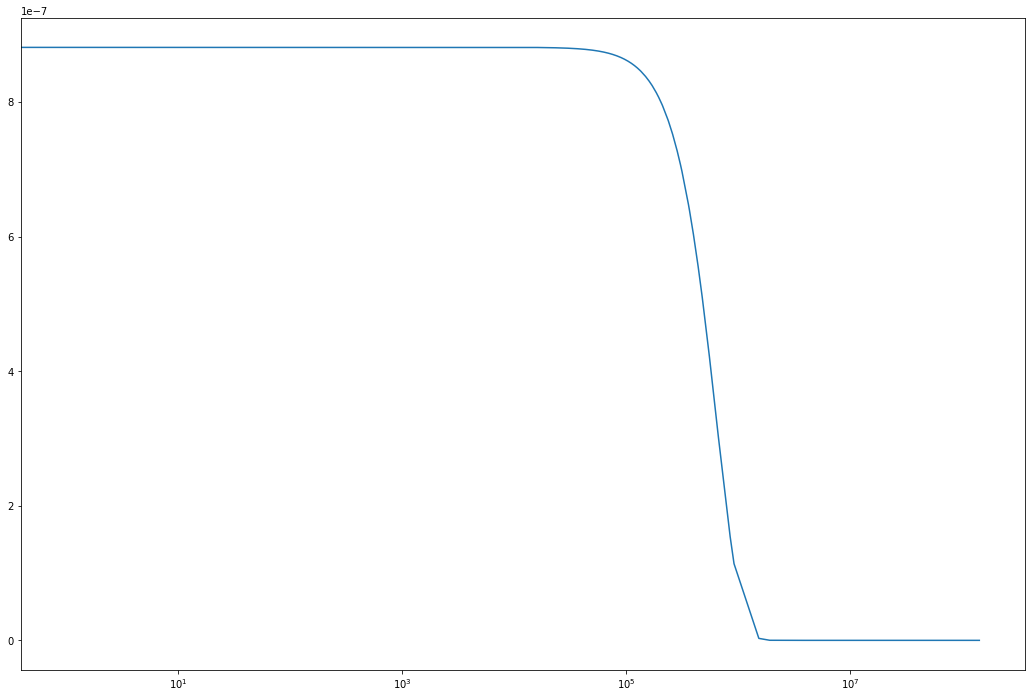

In [35]:

x = sorted(dtl.copy())
fig, ax = plt.subplots(figsize=(18,12))

mean = statistics.mean(x)
sd = statistics.stdev(x)

ax.set_xscale('log')

plt.plot(x, norm.pdf(x, mean, sd))